# Introduction

In the ever-growing global agricultural sector, quality control and classification of crops are crucial. Among the variety of crops, dry beans present a unique classification challenge due to the similarities in features among different types. Our project focused on seven distinct types of dry beans, each characterized by nuanced differences in form, shape, type, and structure that reflect their specific market status.

The objective of our project was to build a high-dimensional, multiclass classification model capable of accurately identifying the seven dry bean varieties. This endeavor addresses a practical need in the agricultural industry for precise and efficient seed classification, promoting the distribution of uniform seed types to markets. Our approach combines supervised learning with XGBoost and more advanced Artifical Neural Network (ANN), providing an innovative solution to a multifaceted agricultural challenge.


# Data Overview

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_csv('/content/drive/MyDrive/Bean_Dataset.csv', sep=',', header=0)

In [4]:
df.head(5)

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272751,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13611 entries, 0 to 13610
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             13611 non-null  int64  
 1   Perimeter        13611 non-null  float64
 2   MajorAxisLength  13611 non-null  float64
 3   MinorAxisLength  13611 non-null  float64
 4   AspectRation     13611 non-null  float64
 5   Eccentricity     13611 non-null  float64
 6   ConvexArea       13611 non-null  int64  
 7   EquivDiameter    13611 non-null  float64
 8   Extent           13611 non-null  float64
 9   Solidity         13611 non-null  float64
 10  roundness        13611 non-null  float64
 11  Compactness      13611 non-null  float64
 12  ShapeFactor1     13611 non-null  float64
 13  ShapeFactor2     13611 non-null  float64
 14  ShapeFactor3     13611 non-null  float64
 15  ShapeFactor4     13611 non-null  float64
 16  Class            13611 non-null  object 
dtypes: float64(1

Check to see if there is any missing data.

In [6]:
missing_data = df.isnull().sum()
print(missing_data)

Area               0
Perimeter          0
MajorAxisLength    0
MinorAxisLength    0
AspectRation       0
Eccentricity       0
ConvexArea         0
EquivDiameter      0
Extent             0
Solidity           0
roundness          0
Compactness        0
ShapeFactor1       0
ShapeFactor2       0
ShapeFactor3       0
ShapeFactor4       0
Class              0
dtype: int64


# Data Exploration & Visualization

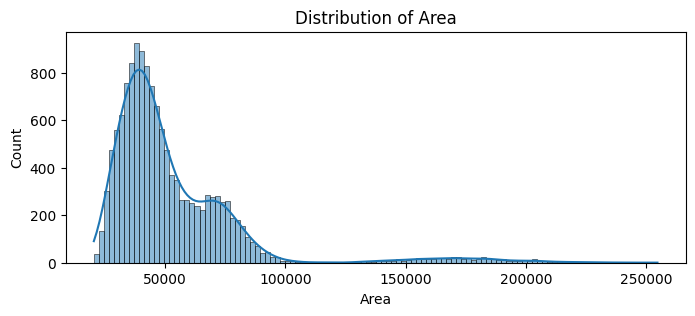

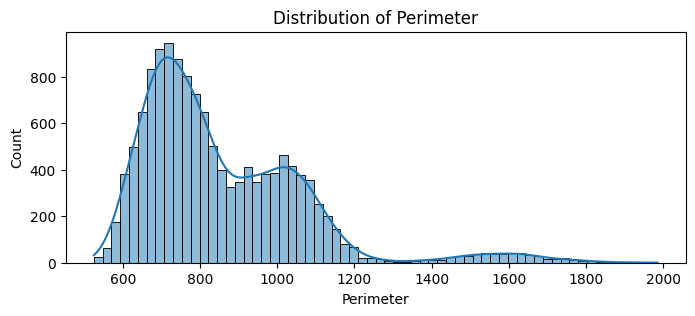

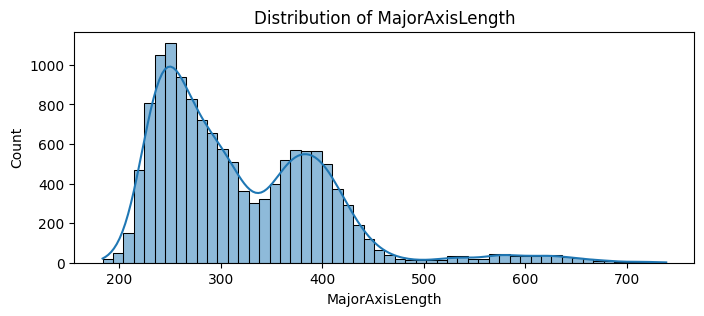

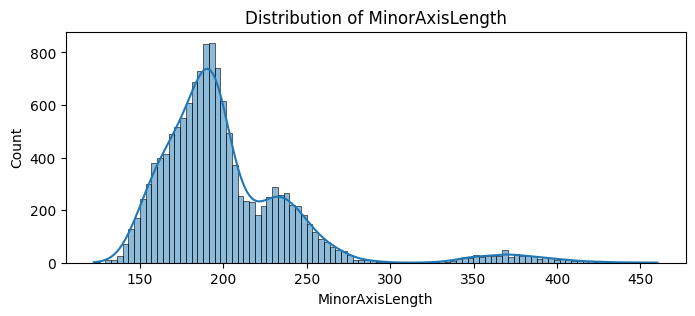

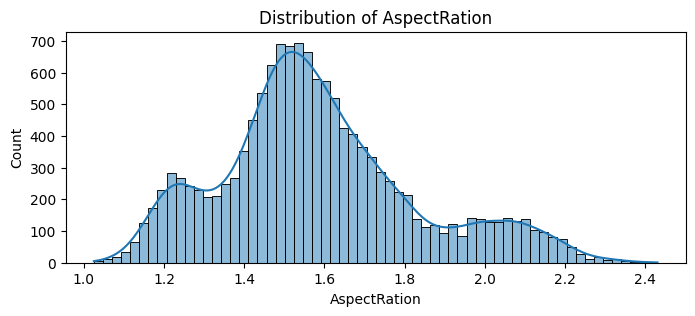

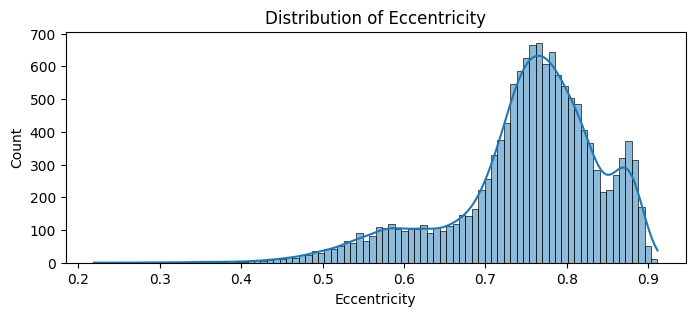

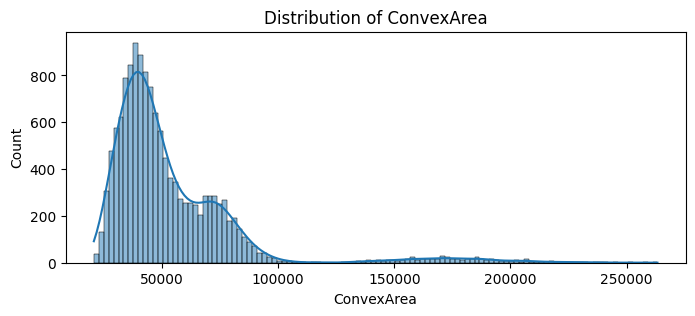

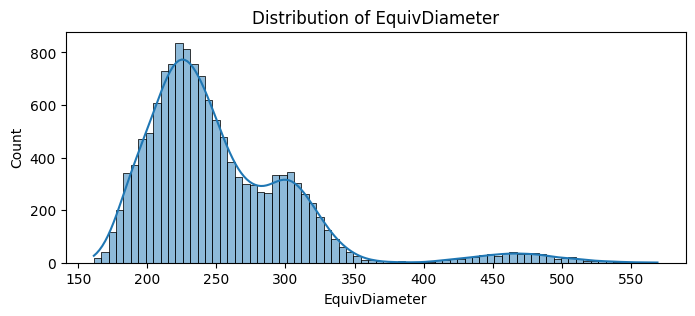

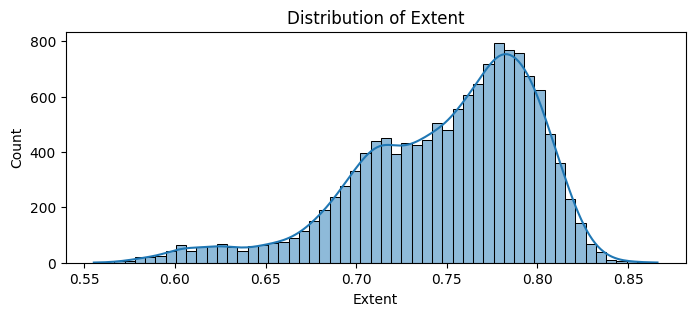

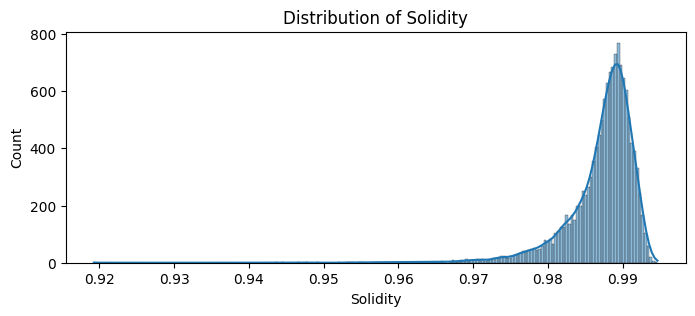

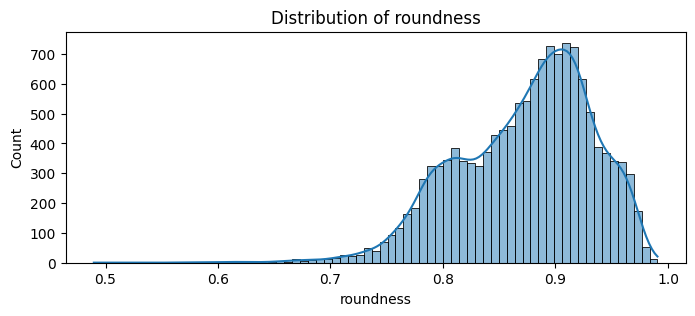

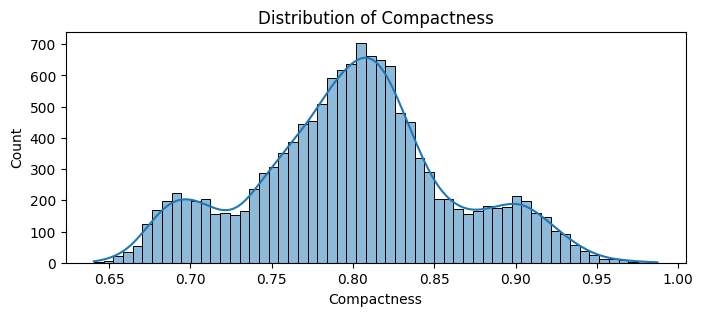

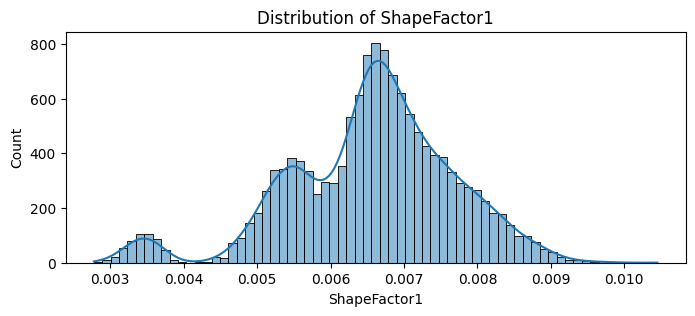

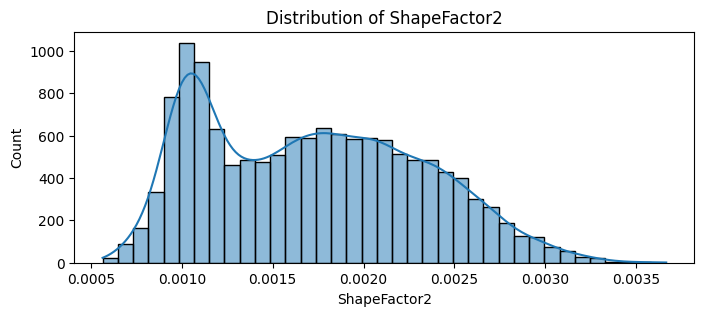

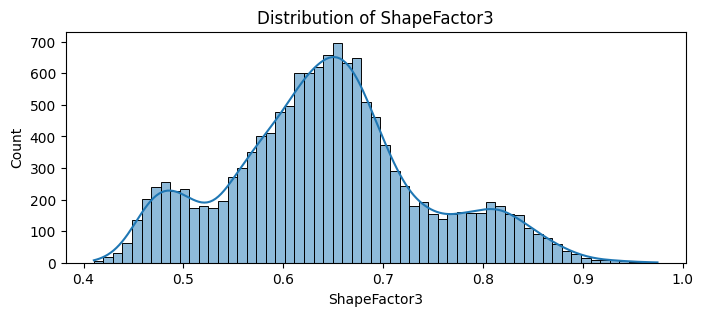

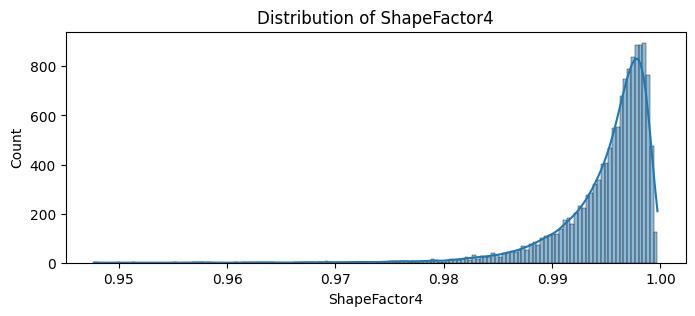

In [7]:
numerical_features = df.select_dtypes(include=['int64', 'float64']).columns

for feature in numerical_features:
    plt.figure(figsize=(8, 3))
    sns.histplot(df[feature], kde=True)
    plt.title(f'Distribution of {feature}')
    plt.show()


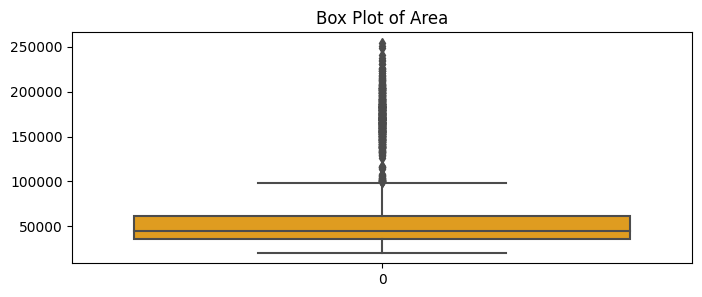

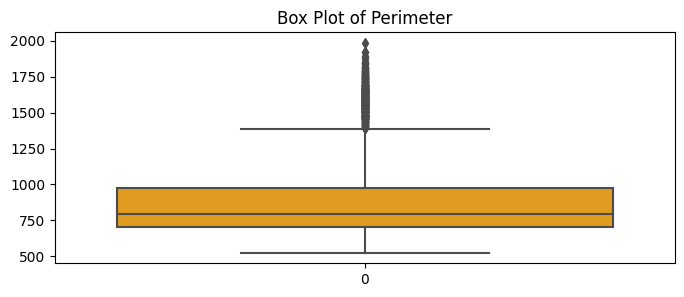

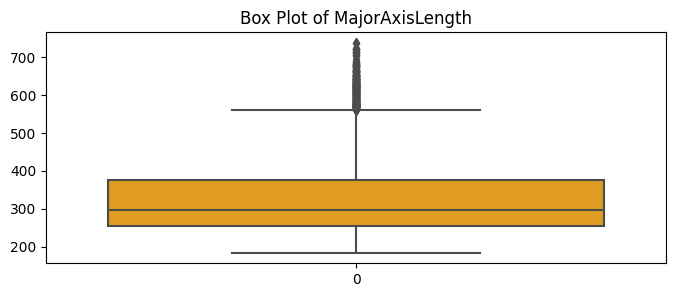

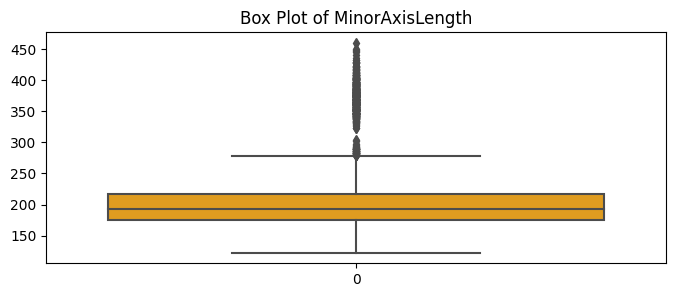

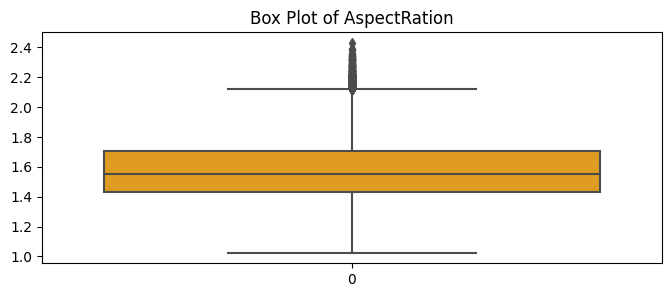

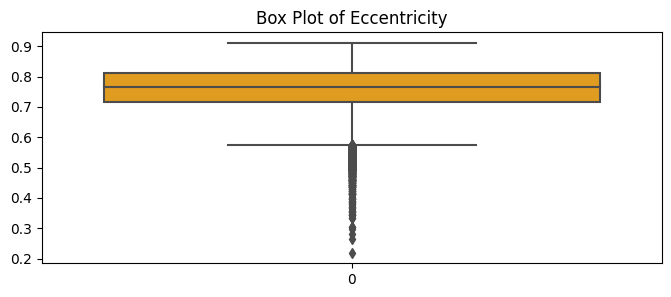

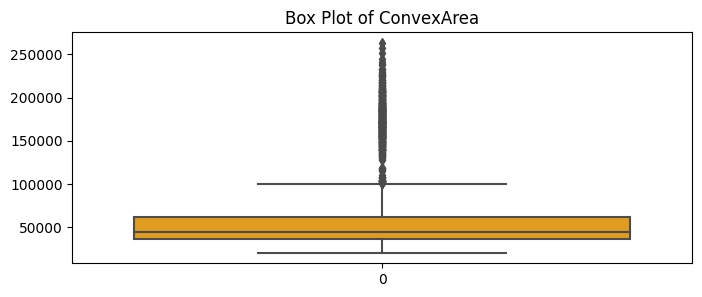

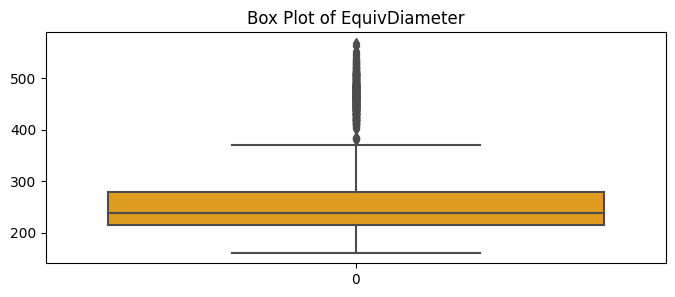

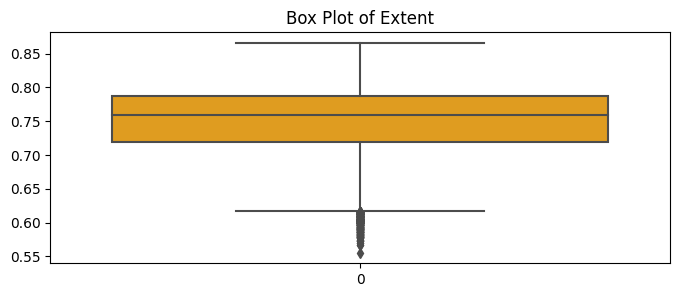

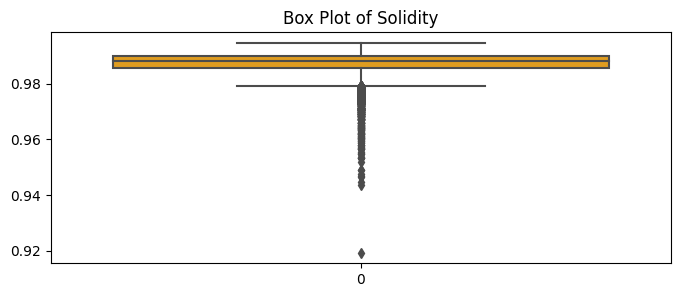

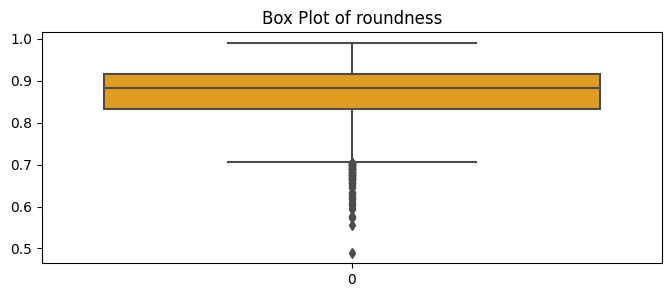

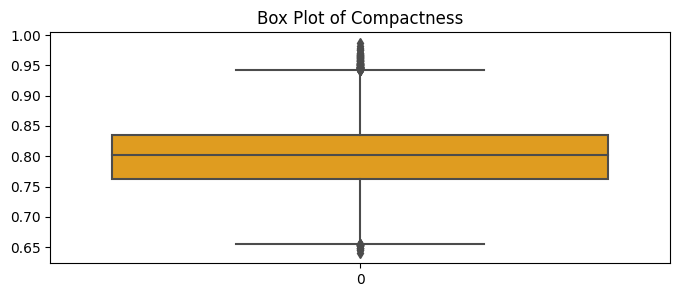

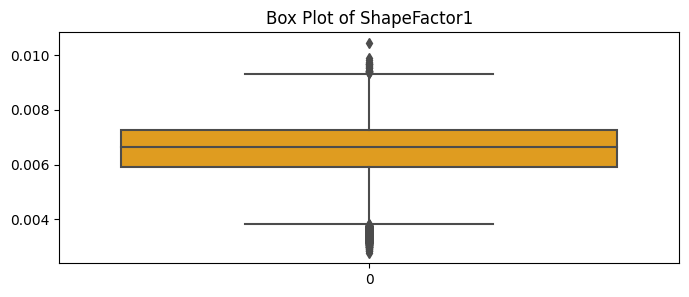

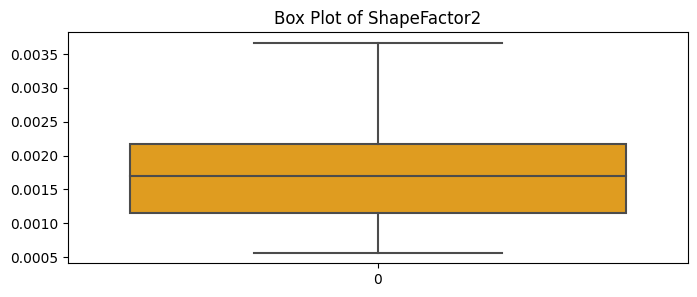

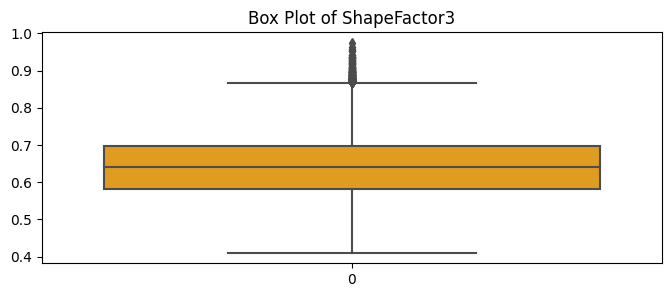

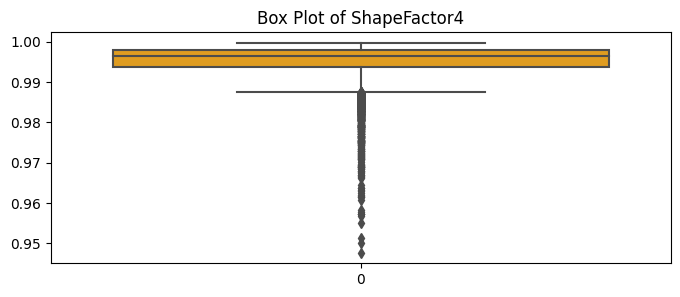

In [8]:
for feature in numerical_features:
    plt.figure(figsize=(8, 3))  # Adjust the figure size for better visibility
    sns.boxplot(df[feature],color='orange')
    plt.title(f'Box Plot of {feature}')
    plt.show()

<ipython-input-13-d3a00f34e0ab>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


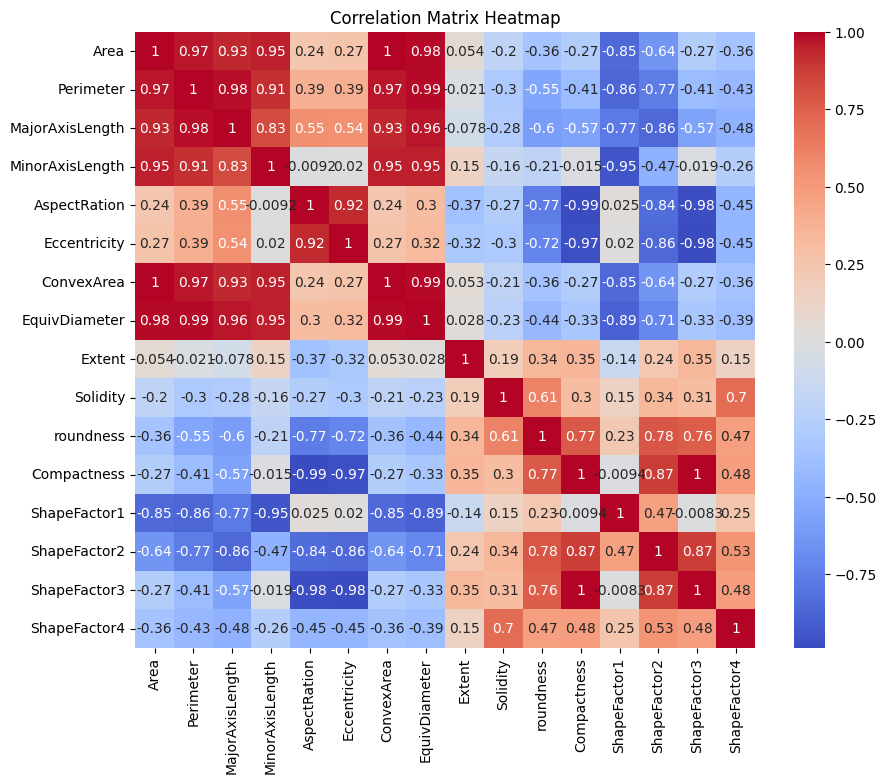

In [13]:
correlation_matrix = df.corr()
plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')
plt.show()

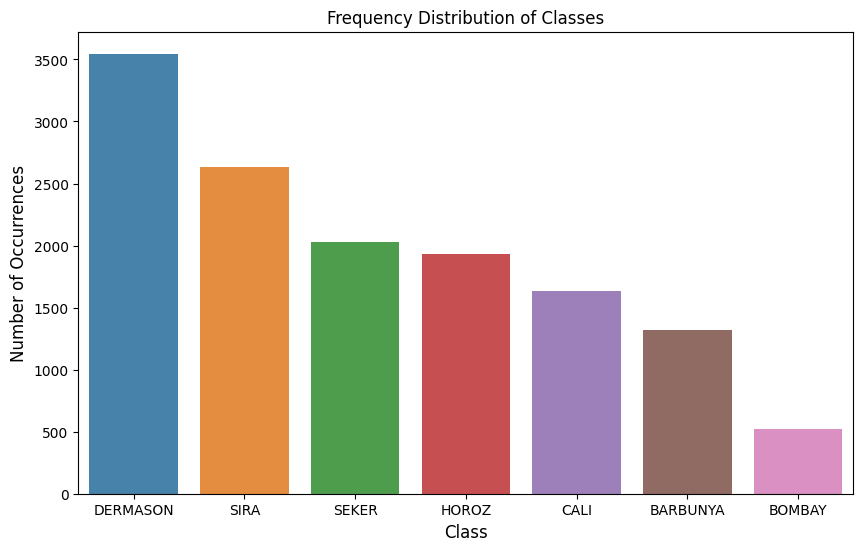

In [17]:
# Count the frequency of each class
class_frequency = df['Class'].value_counts()

# Create a bar plot
plt.figure(figsize=(10,6))
sns.barplot(x=class_frequency.index, y=class_frequency.values, alpha=0.9)

plt.title('Frequency Distribution of Classes')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Class', fontsize=12)
plt.show()

The illustration above shows that there is evidence for class imbalance. This might have a negative effective on our models since we will use 'accuracy' as a metric a lot, this will invalidate such results. We will solve this problem by oversampling with SMOTE in the following sections.

# Feature Selection

We will use a tree classifier to extract each feature's importance.

In [7]:
from sklearn.ensemble import ExtraTreesClassifier

X = df.iloc[:,0:16]  # independent columns
y = df.iloc[:,-1]    # target column

model = ExtraTreesClassifier()
model.fit(X,y)

feature_importances = model.feature_importances_
feature_names = X.columns

# Pair the feature names with the importances
importances = list(zip(feature_names, feature_importances))

# Sort the feature importances by most important first
importances.sort(key=lambda x: x[1], reverse=True)

for feature_name, importance in importances:
    print(f"{feature_name}: {importance}")


ShapeFactor1: 0.08882733146615877
Perimeter: 0.08124490534971683
AspectRation: 0.08080422512136413
MinorAxisLength: 0.07865903623152047
Compactness: 0.07828043498398114
ShapeFactor3: 0.0733719420262446
Area: 0.07203754506859672
ConvexArea: 0.06937880955011633
ShapeFactor2: 0.06864991614302958
MajorAxisLength: 0.06742862884193833
Eccentricity: 0.06364148416560339
EquivDiameter: 0.06314128792150153
roundness: 0.053943594597442523
ShapeFactor4: 0.028262673882982158
Solidity: 0.0181000029959555
Extent: 0.014228181653847961


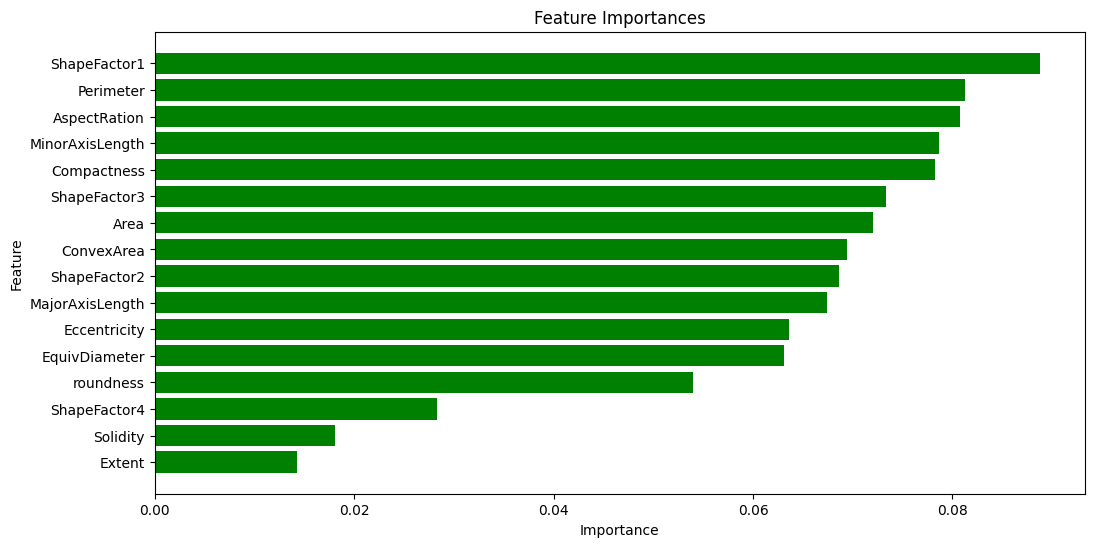

In [11]:
# Get the sorted feature names and importances
sorted_feature_names = [item[0] for item in importances]
sorted_importances = [item[1] for item in importances]
# Create the bar plot
plt.figure(figsize=(12,6))
plt.barh(sorted_feature_names, sorted_importances, color='green')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances')
plt.gca().invert_yaxis()  # Invert the y-axis to have the highest importance at the top
plt.show()

According to the illustration above, I will drop the 3 least important features: Extent, Solidity and ShapeFactor4.

In [5]:
# Define the feature variables (X)
X = df.drop(columns=["Class", "Extent", "Solidity", "ShapeFactor4"])

# Define the target variable (y)
y = df["Class"]

Now let's take a look at our selected features:

In [13]:
# Convert X to a DataFrame
X_df = pd.DataFrame(X, columns=X.columns)

# Print the first few rows of X
X_df.head(5)

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.958027,0.913358,0.007332,0.003147,0.834222
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272751,0.887034,0.953861,0.006979,0.003564,0.909851
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.947849,0.908774,0.007244,0.003048,0.825871
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.903936,0.928329,0.007017,0.003215,0.861794
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.984877,0.970516,0.006697,0.003665,0.941900


# Artificial Neural Network (ANN)

The proposed procedure will be:
1. Data splitting into training (80%) and testing (20%) set
2. Data standardization using Standard Scaler
3. Solving class imbalance with oversampling using SMOTE
4. Label encoding to transform categorical labels into numerical labels
5. Model building and training
6. Model testing
7. Hyperparameters tuning using keras_tuner


In [7]:
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score, classification_report

In [15]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Apply SMOTE to oversample the minority class
smote = SMOTE(random_state=1)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [19]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
y_train_resampled_encoded = encoder.fit_transform(y_train_resampled)
y_test_encoded = encoder.transform(y_test)

In [16]:
# Build the ANN model
model = Sequential()
model.add(Dense(64, activation='relu', input_dim=X_train_resampled.shape[1]))
model.add(Dense(64, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))

# Compile the model
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [20]:
import time
# Start the timer
start_time = time.time()

# Train the model
model.fit(X_train_resampled, y_train_resampled_encoded, epochs=100, batch_size=32, verbose=1)

# Stop the timer and calculate the runtime
runtime = time.time() - start_time

Epoch 1/100
622/622 [==============================] - 2s 2ms/step - loss: 0.3288 - accuracy: 0.8904
Epoch 2/100
622/622 [==============================] - 2s 2ms/step - loss: 0.2020 - accuracy: 0.9274
Epoch 3/100
622/622 [==============================] - 2s 3ms/step - loss: 0.1954 - accuracy: 0.9299
Epoch 4/100
622/622 [==============================] - 2s 3ms/step - loss: 0.1929 - accuracy: 0.9297
Epoch 5/100
622/622 [==============================] - 1s 2ms/step - loss: 0.1896 - accuracy: 0.9320
Epoch 6/100
622/622 [==============================] - 1s 2ms/step - loss: 0.1888 - accuracy: 0.9314
Epoch 7/100
622/622 [==============================] - 1s 2ms/step - loss: 0.1856 - accuracy: 0.9318
Epoch 8/100
622/622 [==============================] - 1s 2ms/step - loss: 0.1848 - accuracy: 0.9320
Epoch 9/100
622/622 [==============================] - 1s 2ms/step - loss: 0.1805 - accuracy: 0.9336
Epoch 10/100
622/622 [==============================] - 1s 2ms/step - loss: 0.1796 - accura

In [21]:
# Make predictions
y_pred_prob = model.predict(X_test)
y_pred = y_pred_prob.argmax(axis=1)

# Evaluate the model
accuracy = accuracy_score(y_test_encoded, y_pred)
report = classification_report(y_test_encoded, y_pred)

print("Accuracy:", round(accuracy,4))
print("Classification Report:\n", report)
print("Runtime:", round(runtime, 2), "seconds")

86/86 [==============================] - 1s 3ms/step
Accuracy: 0.924
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.94      0.91       270
           1       1.00      1.00      1.00       103
           2       0.96      0.89      0.92       333
           3       0.91      0.94      0.92       705
           4       0.96      0.97      0.96       386
           5       0.93      0.97      0.95       405
           6       0.90      0.84      0.87       521

    accuracy                           0.92      2723
   macro avg       0.93      0.93      0.93      2723
weighted avg       0.92      0.92      0.92      2723

Runtime: 142.57 seconds


# Hyperparameters Tuning

For hyperparameters tuning we would use keras_tuner and RandomSearch.

In [26]:
pip install keras-tuner --upgrade

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 176.1/176.1 kB 6.2 MB/s eta 0:00:00


In [27]:
from keras_tuner import HyperModel, RandomSearch

# Define the model architecture within a function, using hyperparameters where desired
def build_model(hp):
    model = Sequential()
    model.add(Dense(hp.Int('nodes', min_value=32, max_value=512, step=32),
                    activation='relu',
                    input_dim=X_train_resampled.shape[1]))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(10, activation='softmax'))

    model.compile(
        optimizer=keras.optimizers.Adam(
            hp.Choice('learning_rate', [1e-2, 1e-3, 1e-4])),
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy'])

    return model

# Define the tuner
tuner = RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=5,  # set number of trials, in a real project this should be a higher number
    executions_per_trial=3,  # model will be trained this many times per trial to average out performance
    directory='.',
    project_name='keras_tuner_demo')

# Start the search for the best hyperparameters
tuner.search(X_train_resampled, y_train_resampled_encoded,
             validation_split=0.2,  # hold out 20% of the data for validation
             epochs=5)  # set number of epochs, in a real project this should be a higher number

# Get the optimal hyperparameters
best_hps=tuner.get_best_hyperparameters(num_trials=1)[0]

Trial 5 Complete [00h 00m 33s]
val_accuracy: 0.9345567226409912

Best val_accuracy So Far: 0.935897429784139
Total elapsed time: 00h 02m 52s


In [30]:
# Print the optimal hyperparameters
print(f"""
The hyperparameter search is complete.
The optimal number of nodes in the first densely-connected layer is {best_hps.get('nodes')}
and the optimal learning rate for the optimizer is {best_hps.get('learning_rate')}.
""")


The hyperparameter search is complete. 
The optimal number of nodes in the first densely-connected layer is 480 
and the optimal learning rate for the optimizer is 0.001.



In [31]:
# Build the model with the optimal hyperparameters and train it on the data
modelTuned = tuner.hypermodel.build(best_hps)

# Start the timer
start_time = time.time()

modelTuned.fit(X_train_resampled, y_train_resampled_encoded, epochs=100, validation_split=0.2)

# Stop the timer and calculate the runtime
runtime = time.time() - start_time

Epoch 1/100
498/498 [==============================] - 3s 3ms/step - loss: 0.3149 - accuracy: 0.8958 - val_loss: 0.2219 - val_accuracy: 0.9314
Epoch 2/100
498/498 [==============================] - 2s 4ms/step - loss: 0.2064 - accuracy: 0.9231 - val_loss: 0.2167 - val_accuracy: 0.9253
Epoch 3/100
498/498 [==============================] - 2s 4ms/step - loss: 0.2002 - accuracy: 0.9263 - val_loss: 0.2264 - val_accuracy: 0.9241
Epoch 4/100
498/498 [==============================] - 2s 4ms/step - loss: 0.1952 - accuracy: 0.9277 - val_loss: 0.2183 - val_accuracy: 0.9221
Epoch 5/100
498/498 [==============================] - 1s 3ms/step - loss: 0.1937 - accuracy: 0.9275 - val_loss: 0.2131 - val_accuracy: 0.9286
Epoch 6/100
498/498 [==============================] - 1s 3ms/step - loss: 0.1899 - accuracy: 0.9302 - val_loss: 0.2336 - val_accuracy: 0.9165
Epoch 7/100
498/498 [==============================] - 1s 3ms/step - loss: 0.1886 - accuracy: 0.9292 - val_loss: 0.2643 - val_accuracy: 0.9065

In [32]:
# Make predictions
y_pred_probTuned = modelTuned.predict(X_test)
y_predTuned = y_pred_probTuned.argmax(axis=1)

# Evaluate the model
accuracy = accuracy_score(y_test_encoded, y_predTuned)
report = classification_report(y_test_encoded, y_predTuned)

print("Accuracy:", round(accuracy,4))
print("Classification Report:\n", report)
print("Runtime:", round(runtime, 2), "seconds")

86/86 [==============================] - 0s 1ms/step
Accuracy: 0.9273
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.89      0.91       270
           1       1.00      1.00      1.00       103
           2       0.90      0.94      0.92       333
           3       0.91      0.94      0.93       705
           4       0.96      0.97      0.96       386
           5       0.96      0.94      0.95       405
           6       0.89      0.86      0.88       521

    accuracy                           0.93      2723
   macro avg       0.94      0.93      0.94      2723
weighted avg       0.93      0.93      0.93      2723

Runtime: 178.75 seconds


Hyperparameters tuning yielded limited improvement in accuracy yet training time increased significantly from 142s to 179s.

# Result Visualization

In [35]:
history = model.fit(X_train_resampled, y_train_resampled_encoded, epochs=100, validation_split=0.2)

Epoch 1/100
498/498 [==============================] - 1s 3ms/step - loss: 0.0921 - accuracy: 0.9613 - val_loss: 0.1078 - val_accuracy: 0.9608
Epoch 2/100
498/498 [==============================] - 1s 3ms/step - loss: 0.0893 - accuracy: 0.9611 - val_loss: 0.0976 - val_accuracy: 0.9643
Epoch 3/100
498/498 [==============================] - 1s 3ms/step - loss: 0.0892 - accuracy: 0.9619 - val_loss: 0.0828 - val_accuracy: 0.9706
Epoch 4/100
498/498 [==============================] - 1s 2ms/step - loss: 0.0912 - accuracy: 0.9615 - val_loss: 0.1008 - val_accuracy: 0.9633
Epoch 5/100
498/498 [==============================] - 1s 2ms/step - loss: 0.0840 - accuracy: 0.9637 - val_loss: 0.1001 - val_accuracy: 0.9661
Epoch 6/100
498/498 [==============================] - 1s 2ms/step - loss: 0.0877 - accuracy: 0.9629 - val_loss: 0.1167 - val_accuracy: 0.9590
Epoch 7/100
498/498 [==============================] - 1s 2ms/step - loss: 0.0878 - accuracy: 0.9636 - val_loss: 0.0908 - val_accuracy: 0.9663

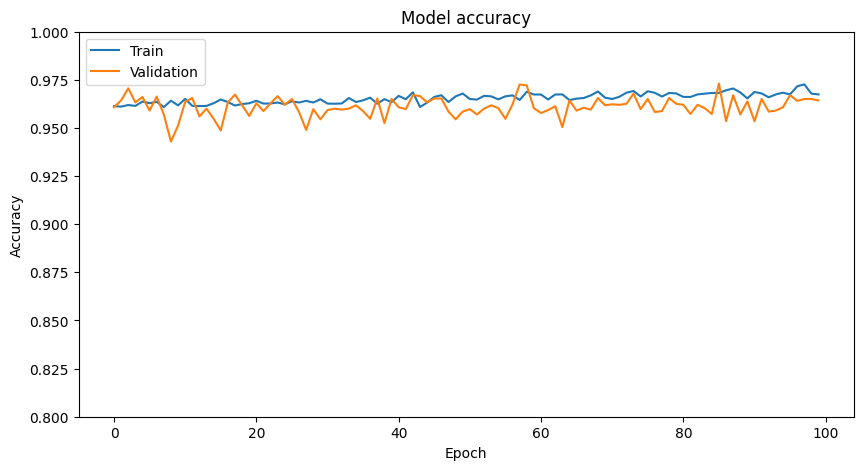

In [41]:
# Accuracy plot
plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.ylim([0.8, 1])
plt.show()

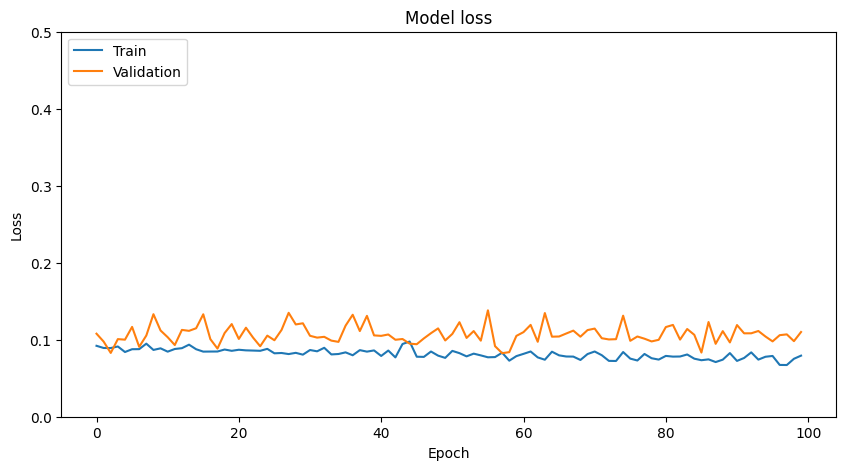

In [43]:
# Loss plot
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.ylim([0, 0.5])
plt.show()

In [50]:
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)  # convert probabilities to class labels

86/86 [==============================] - 0s 2ms/step


In [54]:
y_pred_classes_str = le.inverse_transform(y_pred_classes)
conf_mat = confusion_matrix(y_test, y_pred_classes_str)

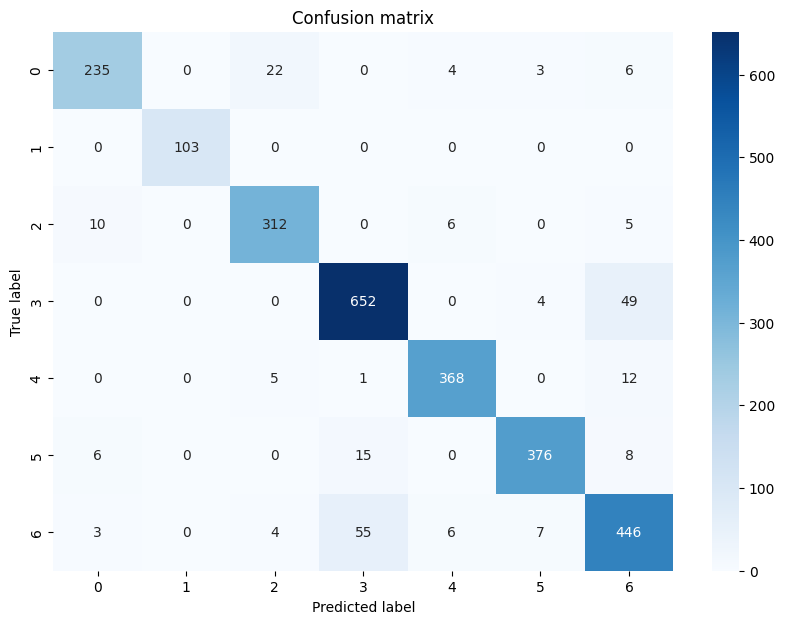

In [63]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Plot the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap="Blues")
plt.title("Confusion matrix")
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

86/86 [==============================] - 0s 1ms/step


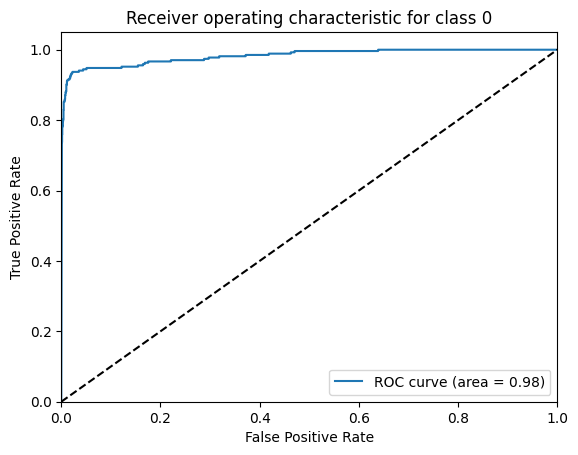

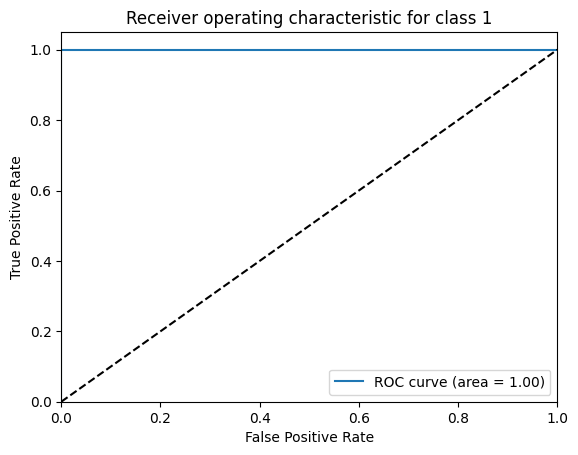

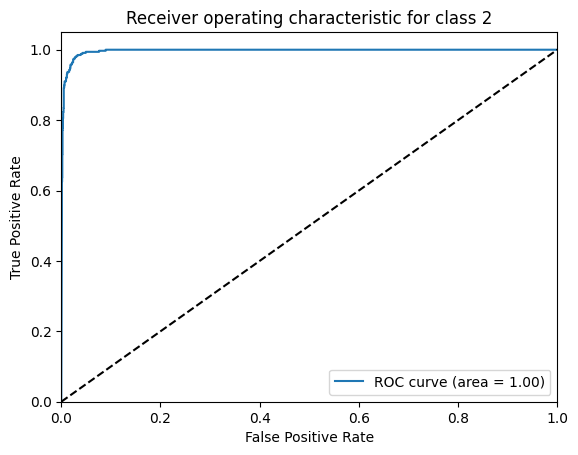

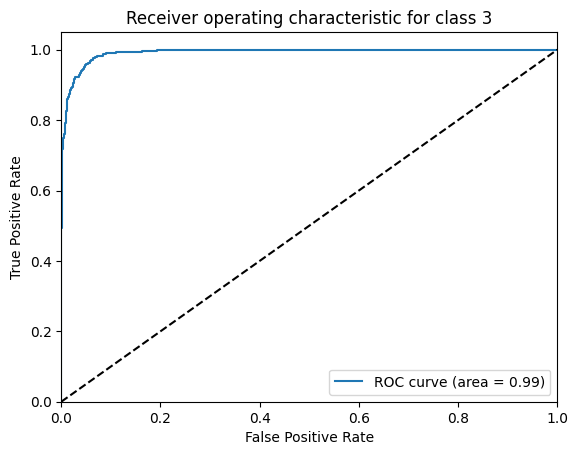

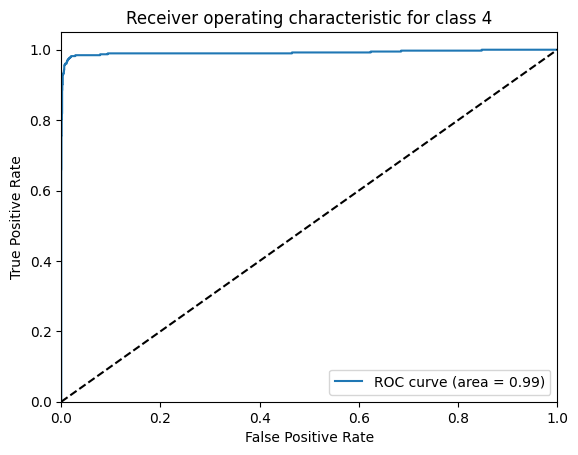

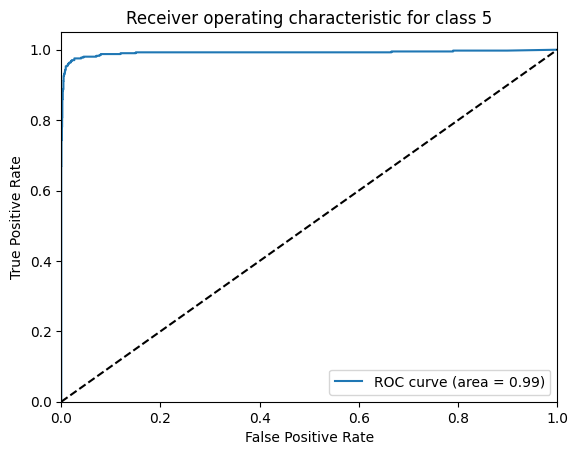

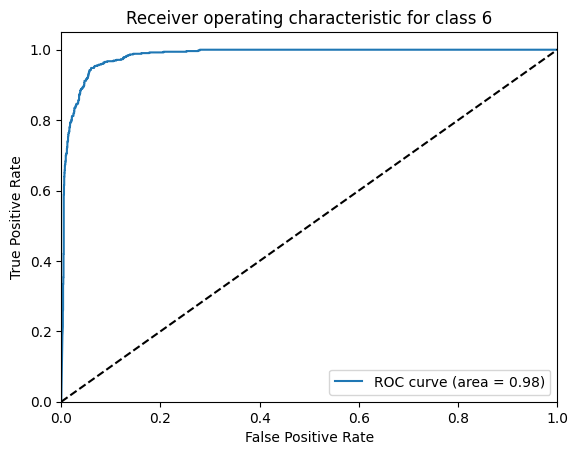

In [60]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import roc_auc_score

# Binarize the output
lb = LabelBinarizer()
lb.fit(y_test)
y_test_bin = lb.transform(y_test)
y_pred_prob = model.predict(X_test)

n_classes = y_test_bin.shape[1]

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_pred_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot of a ROC curve for a specific class
for i in range(n_classes):
    plt.figure()
    plt.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f)' % roc_auc[i])
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic for class {}'.format(i))
    plt.legend(loc="lower right")
    plt.show()



# Supervised Approach with XGBoost

In [8]:
import xgboost as xgb
from sklearn.preprocessing import LabelEncoder

# Map the original classes to numerical classes
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=1)

# Apply feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Apply SMOTE to oversample the minority class
smote = SMOTE(random_state=1)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train)


In [10]:
import time

# Create an XGBoost classifier
xgb_classifier = xgb.XGBClassifier(
    objective='multi:softprob',
    num_class=7,  # number of classes
    random_state=1)

# Start the timer
start_time = time.time()

# Train the XGBoost classifier
xgb_classifier.fit(X_train_resampled, y_train_resampled)

# Stop the timer and calculate the runtime
runtime = time.time() - start_time

In [11]:
# Make predictions on the training set
y_train_pred = xgb_classifier.predict(X_train_resampled)

# Evaluate the model on training data
training_accuracy = accuracy_score(y_train_resampled, y_train_pred)

print("Training Accuracy:", round(training_accuracy, 4))

Training Accuracy: 0.9982


In [12]:
# Make predictions on the test set
y_pred = xgb_classifier.predict(X_test_scaled)

# Evaluate the model

accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Accuracy:", round(accuracy,4))
print("Classification Report:\n", report)
print("Runtime:", round(runtime, 2), "seconds")

Accuracy: 0.9207
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.88      0.90       270
           1       1.00      1.00      1.00       103
           2       0.92      0.92      0.92       333
           3       0.92      0.92      0.92       705
           4       0.96      0.96      0.96       386
           5       0.96      0.94      0.95       405
           6       0.85      0.88      0.87       521

    accuracy                           0.92      2723
   macro avg       0.93      0.93      0.93      2723
weighted avg       0.92      0.92      0.92      2723

Runtime: 39.68 seconds


# Conclusion

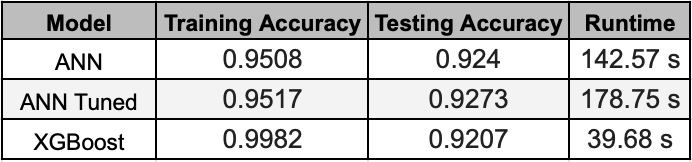

Deep learning architecture such as Artificial Neural Network is considered more advanced compared to traditional supervised methods such as ensemble learning (XGBoost). However, the use of Deep Learning does not always guarantee better testing accuracy or better efficiency when it comes to utilizing computing resources. Indeed, according to our experiments, XGBoost outperformed ANN in term of efficiency with runtime 4 times faster than the deep learning model. Moreover, the tesing accuracy of the XGBoost model is also comparable to the ANN at 0.92. In other words, Deep Learning architecture is only useful in certain use cases such as computer vision or processing in-depth language model transformer with 100 million plus parameters. For high dimensional multiclass classification task with numerical features, it is still advisable to first experiment with less resource intensive supervised methods such as Random Forest, SVM or XGBoost. The selection of best methods thus relies on balancing accuracy for future generalizability and efficiency for large scale production.